In [15]:
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import Normalize
from PIL import Image
import scipy.io as sio

from pc import PS
from modules import ADC,DAC,CHIP
from cimCommand import CMD,CmdData,Packet
from cimCommand.singleCmdInfo import *

from util import plot_v_cond

In [16]:
chip=CHIP(PS(host="192.168.1.10", port = 7, debug=0),init=True)
chip.set_device_cfg(deviceType=0)

Connected to 192.168.1.10:7
local ip: 192.168.1.15 local port: 62010


In [17]:
chip.adc.set_gain_resistor()

In [18]:
def set_device(row,col,write_voltage,tg,pulse_width):
    chip.set_op_mode2(read=False,from_row=True,clearv=False)
    chip.set_pulse_width(pulse_width)
    chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

def reset_device(row,col,write_voltage,tg,pulse_width):
    chip.set_op_mode2(read=False,from_row=False,clearv=False)
    chip.set_pulse_width(pulse_width)
    chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

def read_device(row,col,read_voltage,tg,gain):
    chip.set_op_mode2(read=True,from_row=True,clearv=False)
    chip.set_tia_gain(gain)
    vres = chip.read2(row_index=[row],col_index=[col],read_voltage=read_voltage,tg=tg,check_tia=True,sum=False)
    return chip.voltage_to_cond(vres[0,0])

In [50]:
row ,col = 250,50
matrix = np.zeros((256,256))
matrix[row,col]=1
print(read_device(row ,col,read_voltage=0.2,tg=5,gain=1))

729.3556981329112


In [51]:
reset_device(row,col,write_voltage=2,tg=5,pulse_width=100e-6)
print(read_device(row ,col,read_voltage=0.2,tg=5,gain=1))

40.686870939908445


In [52]:
set_device(row,col,write_voltage=3,tg=1.6,pulse_width=1e-3)
print(read_device(row ,col,read_voltage=0.2,tg=5,gain=1))

637.6915025134289


In [22]:
data=[[],[]]

In [23]:
# np.save(f'result/res_matrix{n}.npy', res_matrix)

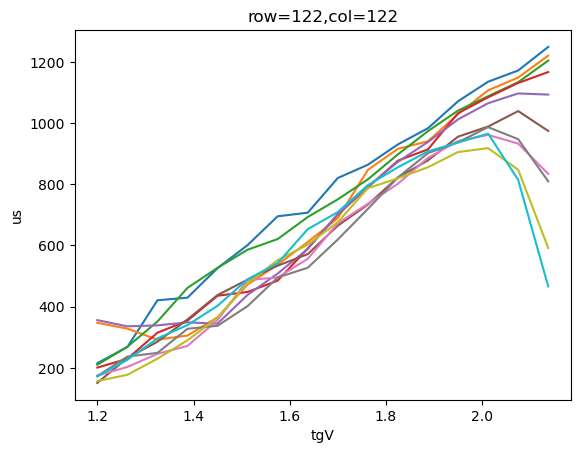

In [24]:
plt.figure()
max_index = 16
deltav= 1/16
for num in range(10):    
    reset_device(row,col,write_voltage=2,tg=5,pulse_width=100e-6)
    vresult = []
    for i in range(0,max_index):
        tg = 1.2 + i*deltav
        set_device(row,col,write_voltage=3,tg=tg,pulse_width=1e-3)
        v = read_device(row,col,read_voltage=0.1,tg=5,gain=1)
        vresult.append(v)
        data[0].append(tg)
        data[1].append(v)

    cond = np.array(vresult)
    plt.plot([1.2 + i*deltav for i in range(max_index)],cond)

plt.title(f'row={row},col={col}')
plt.xlabel('tgV')
plt.ylabel('us')
plt.show()

In [68]:
np.save(f'result/x_y.npy', data)

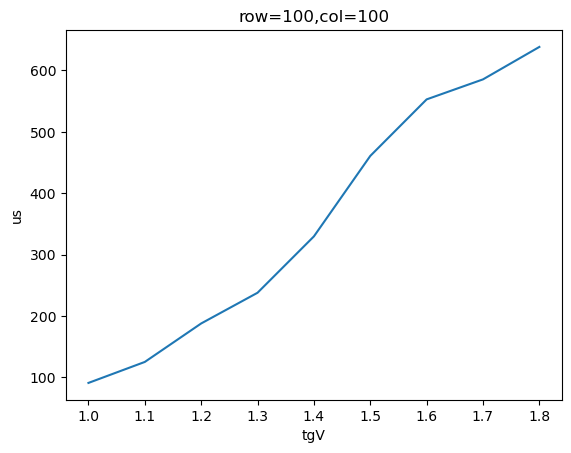

In [ ]:
# reset
chip.write_point2(crossbar=matrix,write_voltage=2,tg=5,pulse_width=100e-6,set_device=False)
# set
chip.write_point2(device_array=matrix,write_voltage=2,tg=5,pulse_width=100e-6,set_device=True)